# In this jupyter notebook the inference over the generative model will be made

In [129]:
import random
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

#minsearch will be used to determine the closest point in the grid later on, effectively making sure that the delta
#functions below are done
def minsearch(x, v):
    return np.where(np.abs(x-v) == np.abs(x-v).min())[0]

For the generative model the reader is refered to the README on the github page (https://github.com/JochemBeurskens/BCI_model_python/blob/main/README.md).
Before the inference can be started, data will be generated using the generative model.
In the generative model arrays that represent the visual and auditory inputs to the participant are generated. These arrays for the case of seperarate sources is given by:
\begin{equation}
\begin{aligned}
     a^{x}_{L_{a}^{x},M_{a}^{x}}(l,t,m) = \delta(l-L^{x}_{a})\delta(m-M^{x}_{a}) f^s_a(c^s_{a}(t)) +e_a(l,t,m)\\
     v^{x}_{L_{v}^{x},M_{v}^{x}}(l,t,m) = \delta(l-L^{x}_{v})\delta(m-M^{x}_{v}) f^s_v(c^s_{v}(t)) +e_v(l,t,m)\\
\end{aligned}
\end{equation} 
Note that the equations for a common source are similar, only then the noisy parameters ($L^{x},M^{x}$) will be drawn from anormal that is centred at the audiovisual stimulus, whereas for separate sources they are drawn from a normal distribution centred at either the visual or auditory stimulus.

Where the parameters $L^{x}$ and $M^{x}$ are drawn from Gaussians centred about the actual stimulus location and meaning. $f^{s}_{a}$ and $f^{s}_{v}$ are linear mapping functions from the values of the random walk described by the parameter $c$ to the auditory or visual amplitude of the observation.

In [130]:
def gen_mod_C1(k,t_max,l,m,n_r,n_lm,mean_rw,sig_ls,sig_lax,sig_lvx,sig_ms,sig_max,sig_mvx,sig_es,sig_eax,sig_evx):
    #firstly the stimuli parameters
    c_avs=np.cumsum(sig_es * np.random.randn(t_max))+ mean_rw #documentation states: sigma * np.random.randn(...) + mu for random number
    L_avs=sig_ls * np.random.randn(1) #meaning and location are stationary in one trial
    M_avs=sig_ms * np.random.randn(1)
    #firstly the noisy location, and the associated grid point so that the non-noise point in the delta function can be determined
    L_avxa=sig_lax * np.random.randn(t_max)+L_avs
    L_avxv=sig_lvx * np.random.randn(t_max)+L_avs
    #next the meaning parameters
    M_avxa=sig_max * np.random.randn(t_max)+M_avs
    M_avxv=sig_mvx * np.random.randn(t_max)+M_avs
    #Now creating the noisy arrays, in which at the i_l,i_m positions the amplitude of the observation will be added
    a_x = sig_eax * np.random.randn(n_lm,n_lm,t_max)
    v_x = sig_evx * np.random.randn(n_lm,n_lm,t_max)    
    for i in range(0,t_max):
        i_lxa = minsearch(L_avxa[i],l)
        i_lxv = minsearch(L_avxv[i],l)
        i_mxa = minsearch(M_avxa[i],m)
        i_mxv = minsearch(M_avxv[i],m)
        a_x[i_lxa,i_mxa,i]=a_x[i_lxa,i_mxa,i]+c_avs[i]
        v_x[i_lxv,i_mxv,i]=v_x[i_lxv,i_mxv,i]+c_avs[i]
    return a_x,v_x

Now making the generative model for the case where the auditory and visual stimuli are separate (C=2).

In [131]:
def gen_mod_C2(k,t_max,l,m,n_r,n_lm,mean_rw,sig_las,sig_lvs,sig_lax,sig_lvx,sig_mas,sig_mvs,sig_max,sig_mvx,sig_eas,sig_evs,sig_eax,sig_evx):
    #firstly the stimuli parameters
    c_as=np.cumsum(sig_eas * np.random.randn(t_max))+ mean_rw #documentation states: sigma * np.random.randn(...) + mu for random number
    c_vs=np.cumsum(sig_evs * np.random.randn(t_max))+ mean_rw
    L_as=sig_las * np.random.randn(1) #meaning and location are stationary in one trial
    L_vs=sig_lvs * np.random.randn(1)
    M_as=sig_mas * np.random.randn(1)
    M_vs=sig_mvs * np.random.randn(1)    
    #firstly the noisy location, and the associated grid point so that the non-noise point in the delta function can be determined
    L_ax=sig_lax * np.random.randn(t_max)+L_as
    L_vx=sig_lvx * np.random.randn(t_max)+L_vs
    #next the meaning parameters
    M_ax=sig_max * np.random.randn(t_max)+M_as
    M_vx=sig_mvx * np.random.randn(t_max)+M_vs
    #Now creating the noisy arrays, in which at the i_l,i_m positions the amplitude of the observation will be added
    a_x = sig_eax * np.random.randn(n_lm,n_lm,t_max)
    v_x = sig_evx * np.random.randn(n_lm,n_lm,t_max)    
    for i in range(0,t_max):
        i_lxa = minsearch(L_ax[i],l)
        i_lxv = minsearch(L_vx[i],l)
        i_mxa = minsearch(M_ax[i],m)
        i_mxv = minsearch(M_vx[i],m)
        a_x[i_lxa,i_mxa,i]=a_x[i_lxa,i_mxa,i]+c_as[i]
        v_x[i_lxv,i_mxv,i]=v_x[i_lxv,i_mxv,i]+c_vs[i]
    return a_x,v_x

Now testing the code by generating arrays.

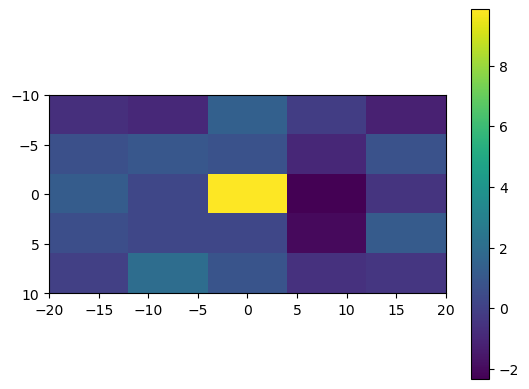

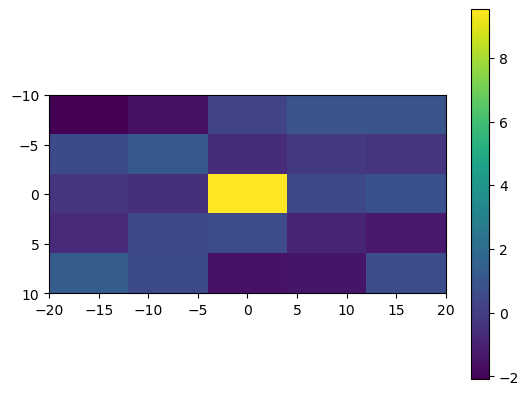

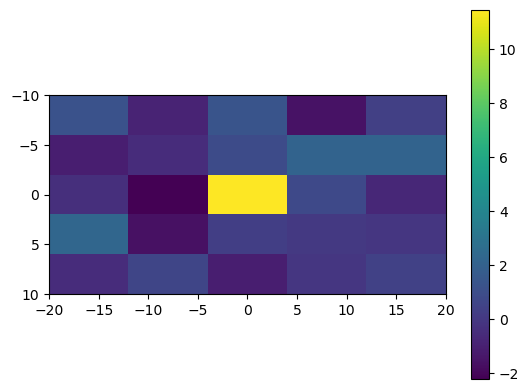

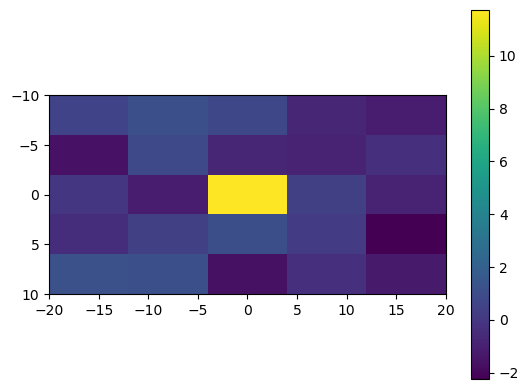

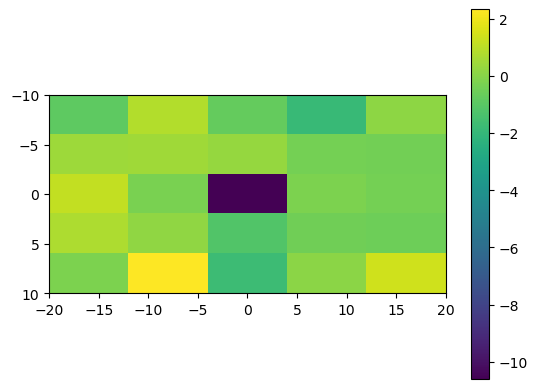

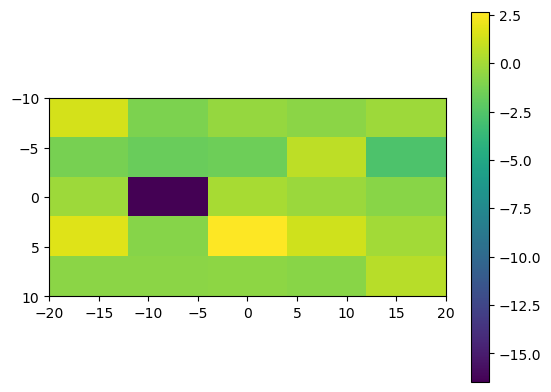

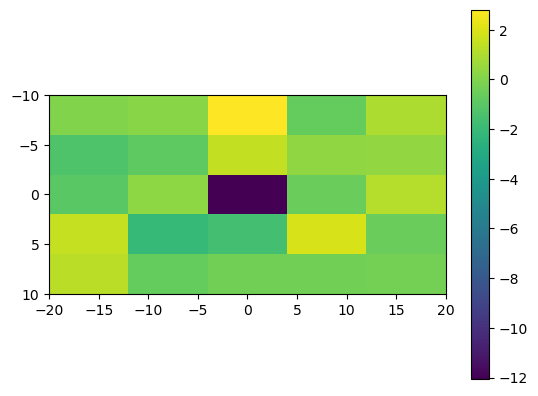

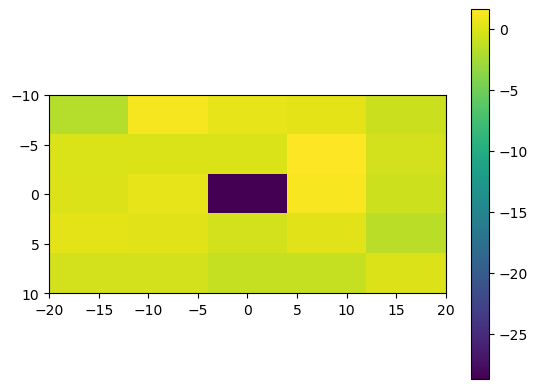

In [132]:
#variances for the caxe of C=1
sig_ls=1;
sig_es=1;
sig_ms=1;

#variances for the caxe of C=2
sig_lvs=1;
sig_las=5; 
sig_mas=1;
sig_mvs=5;
sig_eas=1;
sig_evs=5;

#variances for the x variables, these are the same for either C=1 or C=2, but can also use different values
sig_lax=1;
sig_lvx=1;
sig_eax=1;
sig_evx=1;
sig_max=1;
sig_mvx=1;
p_c=0.5; #the prior probability of either one or two sources
p_h=1;

#specifying the grid
lrange=20
mrange=10
n_lm=5
n=5 #the number of steps into which the space is discretised
m_n=5
n_c=5
l=np.linspace(-lrange,lrange,n)
m=np.linspace(-mrange,mrange,m_n)

#specifying the gain of the linear function, the maximum time, the starting point of the random walk, and the number of repeats
k=1
t_max=2
n_r=1
mean_rw=10
diff_mean=3;
c_l=np.linspace(mean_rw-diff_mean,mean_rw+diff_mean,n_c);

#Running C=1
[a_x,v_x]=gen_mod_C1(k,t_max,l,m,n_r,n_lm,mean_rw,sig_ls,sig_lax,sig_lvx,sig_ms,sig_max,sig_mvx,sig_es,sig_eax,sig_evx)

#plotting
for t in range(0,t_max):
    plt.figure(0+t*2)
    plt.imshow(a_x[:,:,t],extent=[-lrange,lrange, mrange,-mrange])
    plt.colorbar()
    plt.figure(1+t*2)
    plt.imshow(v_x[:,:,t],extent=[-lrange,lrange, mrange,-mrange])
    plt.colorbar()
    
#Now C=2
mean_rw=-10#running the case of C=2 with a distinguishable mean of the random walk, so we can see which plots are
#C=2 and which are C=1

[a_x,v_x]=gen_mod_C2(k,t_max,l,m,n_r,n_lm,mean_rw,sig_las,sig_lvs,sig_lax,sig_lvx,sig_mas,sig_mvs,sig_max,sig_mvx,sig_eas,sig_evs,sig_eax,sig_evx)

#plotting
for t in range(0,t_max):
    plt.figure(t_max+2+t*2)
    plt.imshow(a_x[:,:,t],extent=[-lrange,lrange, mrange,-mrange])
    plt.colorbar()
    plt.figure(t_max+3+t*2)
    plt.imshow(v_x[:,:,t],extent=[-lrange,lrange, mrange,-mrange])
    plt.colorbar()

## The case of a common source (C=1 in the generative model)

The prior in this case is given by:
\begin{equation}
\begin{aligned}
     P(L_{av}^{s}|C=1)= \mathcal{N}(\mu_{L},\sigma_{Ls}^{2}), P(M_{av}^{s}|C=1)= \mathcal{N}(\mu_{M},\sigma_{Ms}^{2}),\\ P(c_{av}^{s}|C=1)= \mathcal{N}(\mu_{c},\sigma_{cs}^{2})\\ 
\end{aligned}
\end{equation} 

The likelihood of the stimuli given the observations is given by:
\begin{equation}
\begin{aligned}
     \mathcal{L}(L^{s}_{av},M^{s}_{av},c^{s}_{av},C=1|a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}})=P({a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}}} | L^{s}_{av},M^{s}_{av},c^{s}_{av},C=1)
     =\\ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}
     dL^{xa}_{av} dM^{xa}_{av} 
     dL^{xv}_{av} dM^{xv}_{av}
     P(L^{xa}_{av} | L^{s}_{av},C=1) 
     P(M^{xa}_{av} | M^{s}_{av},C=1)  P(L^{xv}_{av} | L^{s}_{av},,C=1) 
     \\P(M^{xv}_{av} | M^{s}_{av},C=1)  P({a^{x}_{L^{xa}_{av},M^{xa}_{av}},v^{x}_{L^{xv}_{av},M^{xv}_{av}}} | L^{xa}_{av},M^{xa}_{av},c^{xa}_{av},L^{xv}_{av},M^{xv}_{av},c^{xv}_{av},C=1)=\\ 
     % \int_{-\infty}^{\infty} \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}
     % dL^{x}_{a} dM^{x}_{a} 
     % dL^{x}_{v} dM^{x}_{v}
     % P(L^{x}_{a} | L^s,C=1) 
     % P(M^{x}_{a} | M^s,C=1)  P(L^{x}_{v} | L^s,C=1) 
     % P(M^{x}_{v} | M^s,C=1) \\ \prod_{l_{a}=1}^{n}\prod_{m_{a}=1}^{n_m}N (a^{x}_{L^{x}_{a},M^{x}_{a}}(l_{a},m_{a});\delta(l_{a}-L^{x}_{a})\delta(m_{a}-M^{x}_{a}) f^s_a(c^s),\sigma^2_{av})\\ \prod_{l_{v}=1}^{n}\prod_{m_{v}=1}^{n_m} N (v^{x}_{L^{x}_{v},M^{x}_{v}}(l_{v},m_{v});\delta(l_{v}-L^{x}_{v})\delta(m_{v}-M^{x}_{v}) f^s_a(c^s),\sigma^2_{av})=\\
     \sum_{L^{xa}_{av}} \sum_{M^{xa}_{av}} 
     P(L^{xa}_{av} | L^s_{av},C=1) 
     P(M^{xa}_{av} | M^s_{av},C=1) \cdot \\ \prod_{l_{a}=1}^{n}\prod_{m_{a}=1}^{n_m}N (a^{x}_{L^{x}_{a},M^{x}_{a}}(l,m);\delta(l_{a}-L^{xa}_{av})\delta(m_{a}-M^{xa}_{av}) f^s_a(c^{s}_{av}(t)),\sigma^2_{av})\cdot \\ \sum_{L^{xv}_{av}} \sum_{M^{xv}_{av}} P(L^{xv}_{av} | L^s_{av},C=1) 
     P(M^{xv}_{av} | M^s_{av},C=1) \cdot \\ \prod_{l_{v}=1}^{n}\prod_{m_{v}=1}^{n_m} N (v^{x}_{L^{xv}_{av},M^{xv}_{av}}(l_{v},m_{v});\delta(l_{v}-L^{xv}_{av})\delta(m_{v}-M^{xv}_{av}) f^s_a(c^s),\sigma^2_{av})
     \\
\end{aligned}
\end{equation}

Together the prior and likelihood give the posterior:
\begin{equation}
\begin{aligned}
    P({C=1|a^{x}_{L^{xa}_{av},M^{xa}_{av}},v^{x}_{L^{xv}_{av},M^{xv}_{av}}})=\\ P(C=1)\cdot \frac{\int \int \int P({a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}}} | L^s, M^s, c^s,C=1) \cdot P(L^s|C=1) P(M^s|C=1) P(c^s|C=1)dL^s_{av}dM^s_{av}dc^s_{av}}{P({a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}}})}\\
\end{aligned}
\end{equation}


In [133]:
prob_ax=np.zeros((n,m_n,n_c))
prob_vx=np.zeros((n,m_n,n_c))
prob_avx=np.zeros((n,m_n,n_c))
prob_ax_store=np.zeros((n,m_n))
prob_vx_store=np.zeros((n,m_n))
product_p_ax=np.zeros((n,m_n,n_c))
product_p_vx=np.zeros((n,m_n,n_c))
post_ax=np.zeros((n,m_n,n_c))
post_vx=np.zeros((n,m_n,n_c))
post_avxc1=np.zeros((n,m_n,n_c))

for l_s_i in range(0,n):    
    L_s = l[l_s_i]
    for m_s_i in range(0,m_n):
        M_s = m[m_s_i]
        prob_ax_t=np.ones((n,m_n,1))
        prob_vx_t=np.ones((n,m_n,1))  
        for c_s_i in range(0,n_c):    
            mean_val=c_l[c_s_i];
            for l_x_i in range(0,n):
                L_x=l[l_x_i]
                prob_Lax=norm.pdf(L_x,L_s,sig_lax)
                prob_Lvx=norm.pdf(L_x,L_s,sig_lvx)
                for m_x_i in range(0,m_n):
                    M_x=m[m_x_i]
                    prob_Max=norm.pdf(M_x,M_s,sig_max)
                    prob_Mvx=norm.pdf(M_x,M_s,sig_mvx)
                    for l_i in range(0,n):
                        for m_i in range(0,m_n):
                            if (l_x_i==l_i) and (m_x_i==m_i):                             
                                prob_ax_t[l_i,m_i]=(norm.pdf(a_x[l_i,m_i,0],mean_val,sig_es))
                                prob_vx_t[l_i,m_i]=(norm.pdf(v_x[l_i,m_i,0],mean_val,sig_es))
                            else:
                                prob_ax_t[l_i,m_i]=(norm.pdf(a_x[l_i,m_i,0],0,sig_es))  
                                prob_vx_t[l_i,m_i]=(norm.pdf(v_x[l_i,m_i,0],0,sig_es))     
                    product_p_ax[l_x_i,m_x_i,c_s_i]=prob_Max*prob_Lax*(np.prod(np.prod(prob_ax_t[:,:],1),0))
                    product_p_vx[l_x_i,m_x_i,c_s_i]=prob_Mvx*prob_Lvx*(np.prod(np.prod(prob_vx_t[:,:],1),0))
                prob_ax[l_s_i,m_s_i,c_s_i]=sum(sum(product_p_ax[:,:,c_s_i],2),1)
                prob_vx[l_s_i,m_s_i,c_s_i]=sum(sum(product_p_vx[:,:,c_s_i],2),1)
                prob_avx[l_s_i,m_s_i,c_s_i]=np.dot(prob_ax[l_s_i,m_s_i,c_s_i],prob_vx[l_s_i,m_s_i,c_s_i])
                prob_c_s=norm.pdf(mean_val,mean_rw,sig_es)
                prob_l_s=norm.pdf(L_s,0,sig_ls)
                prob_m_s=norm.pdf(M_s,0,sig_ms)
                post_ax[l_s_i,m_s_i,c_s_i]=prob_c_s*prob_l_s*prob_m_s*prob_ax[l_s_i,m_s_i,c_s_i]
                post_vx[l_s_i,m_s_i,c_s_i]=prob_c_s*prob_l_s*prob_m_s*prob_vx[l_s_i,m_s_i,c_s_i]
                post_avxc1[l_s_i,m_s_i,c_s_i]=prob_c_s*prob_l_s*prob_m_s*prob_avx[l_s_i,m_s_i,c_s_i]

## The case of seperable sources (C=2 in the generative model)

The prior in this case if given by:
\begin{equation}
\begin{aligned}
     P(L_{a}^{s}|C=2)= \mathcal{N}(\mu_{La},\sigma_{Las}^{2}), P(L_{v}^{s}|C=2)= \mathcal{N}(\mu_{Lv},\sigma_{Lvs}^{2}),\\ P(M_{a}^{s}|C=2)= \mathcal{N}(\mu_{Ma},\sigma_{Mas}^{2}), P(M_{v}^{s}|C=2)= \mathcal{N}(\mu_{Mv},\sigma_{Mvs}^{2})\\ P(c_{a}^{s}|C=2)= \mathcal{N}(\mu_{c_{a}},\sigma_{cas}^{2}), P(c_{v}^{s}(t)|C=2)= \mathcal{N}(\mu_{c_{v}},\sigma_{cvs}^{2})
\end{aligned}
\end{equation} 

The Likelihood of the stimuli given the observations is given by:
\begin{equation}
\begin{aligned}
     \mathcal{L}(L^{s}_{a},M^{s}_{a},c^{s}_{a},L^{s}_{v},M^{s}_{v},c^{s}_{v},C=2|a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}})=P({a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}}} | L^{s}_{a},M^{s}_{a},c^{s}_{a},L^{s}_{v},M^{s}_{v},c^{s}_{v},C=2)
     = \\\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \int_{-\infty}^{\infty}
     dL^{x}_{a} dM^{x}_{a} 
     dL^{x}_{v} dM^{x}_{v}
     P(L^{x}_{a} | L^{s}_{a},C=2) 
     P(M^{x}_{a} | M^{s}_{a},C=2)  P(L^{x}_{v} | L^{s}_{v},C=2) 
     P(M^{x}_{v} | M^{s}_{v},C=2) \\ P({a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}}} | L^{x}_{a},M^{x}_{a},c^{x}_{a},L^{x}_{v},M^{x}_{v},c^{x}_{v},C=2) =\\
(l_{a},m_{a});\delta(l_{a}-L^{x}_{a})\delta(m_{a}-M^{x}_{a}) f^s_a(c^s),\sigma^2_a)\\ \prod_{l_{v}=1}^{n}\prod_{m_{v}=1}^{n_m} N (v^{x}_{L^{x}_{v},M^{x}_{v}}(l_{v},m_{v});\delta(l_{v}-L^{x}_{v})\delta(m_{v}-M^{x}_{v}) f^s_a(c^s),\sigma^2_v)\\
     = \sum_{L^{x}_{a}} \sum_{M^{x}_{a}} 
     P(L^{x}_{a} | L^{s}_{a},C=2) 
     P(M^{x}_{a} | M^{s}_{a},C=2)  \prod_{l_{a}=1}^{n}\prod_{m_{a}=1}^{n_m}N (a^{x}_{L^{x}_{a},M^{x}_{a}}(l,m);\delta(l_{a}-L^{x}_{a})\delta(m_{a}-M^{x}_{a}) f^s_a(c^s),\sigma^2_a)\\ \sum_{L^{x}_{v}} \sum_{M^{x}_{v}} P(L^{x}_{v} | L^{s}_{v},C=2) 
     P(M^{x}_{v} | M^{s}_{v},C=2)  \prod_{l_{v}=1}^{n}\prod_{m_{v}=1}^{n_m} N (v^{x}_{L^{x}_{v},M^{x}_{v}}(l_{v},m_{v});\delta(l_{v}-L^{x}_{v})\delta(m_{v}-M^{x}_{v}) f^s_a(c^s),\sigma^2_v)
\end{aligned}
\end{equation}

Together the prior and Likelihood give the information that is needed for the posterior:
\begin{equation}
\begin{aligned}  
    P({C=2|a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}}})=
    \\ P(C=2)\cdot \int \int \int P({a^{x}_{L^{x}_{a},M^{x}_{a}}} | L^{s}_{a}, M^{s}_{a}, c^{s}_{a}, C=2)\cdot P( L^{s}_{a}|C=2) P(M^{s}_{a}|C=2) P(c^{s}_{a}|C=2) dL_{a}^{s} dM_{a}^{s} dc_{a}^{s} \\ \int \int \int P(v^{x}_{L^{x}_{v},M^{x}_{v}}| L^{s}_{v}, M^{s}_{v}, c^{s}_{v},C=2) P( L^{s}_{v}|C=2) P(M^{s}_{v}|C=2) P(c^{s}_{v}|C=2) dL_{v}^{s} dM_{v}^{s} dc_{v}^{s}\cdot \frac{1}{P({a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}}})} \\
    % P({C=2|a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}}})= 
    % \\ \int \int \int \int \int \int P({L^{s}_{a}, M^{s}_{a}, c^{s}_{a}, L^{s}_{v}, M^{s}_{v}, c^{s}_{v},C=2|a^{x}_{L^{x}_{a},M^{x}_{a}},v^{x}_{L^{x}_{v},M^{x}_{v}}})dL_{v}^{s} dM_{v}^{s} dc_{v}^{s} dL_{a}^{s} dM_{a}^{s} dc_{a}^{s} 
    % \textnormal{For the case of C=1:} \\
    % P(C=1|a^{x},v^{x})\propto P(C=1) \cdot P(a^{x}|C=1)\cdot P(v^{x}|C=1)=P(C=1) \cdot \\ \int \int  P(C=1,L_{av}^{s},M_{av}^{s}|a^{x};v^{x}) \cdot 
    %  P(L_{av}^{s}|C=1) P(M_{av}^{s}|C=1) dL_{av}^{s} dM_{av}^{s} \\
    % \textnormal{For the case of C=2:} \\
    % P(C=2|a^{x},v^{x})\propto P(C=2) \cdot P(a^{x}|C=2)\cdot P(v^{x}|C=2)=P(C=2) \cdot \\ \int \int \int \int P(C=2,L_{a}^{s},M_{a}^{s},L_{v}^{s},M_{v}^{s}|a^{x};v^{x}) \cdot  P(L_{a}^{s}|C=2) \cdot P(M_{a}^{s}|C=2) \cdot  \\
    % P(v^{x}|C=2,L_{v}^{s},M_{v}^{s},c_{v}^{s}) P(L_{v}^{s}|C=2) P(M_{v}^{s}|C=2) dL_{v}^{s} dM_{v}^{s} dL_{a}^{s} dM_{a}^{s} \\
\end{aligned}
\end{equation}

The integrals that are needed to calculate the posterior cannot be solved analytically, therefore numerical methods are used.

Following the integrals given above, we can split the numerical solution for this case also into two parts. This code now takes far too long, need to optimise.

In [134]:
prob_ax_tc2=np.zeros((n,m_n))
prob_la=np.zeros(n)
prob_ma=np.zeros(m_n)
product_p_axc2=np.zeros((n,m_n,n_c))
prob_axc2=np.zeros((n,m_n,n_c))
post_axc2=np.zeros((n,m_n,n_c))
for l_s_i in range(0,n):    
    L_sa = l[l_s_i]
    for m_s_i in range(0,m_n):
        M_sa = m[m_s_i]    
        for c_s_i in range(0,n_c):    
            mean_vala=c_l[c_s_i] #c_s, a_x is observed so cannot loop over this, also should not as only integrate/take into account the c_s
            for l_x_i in range(0,n):
                L_xa=l[l_x_i];
                prob_Lax=norm.pdf(L_xa,L_sa,sig_lax)
                for m_x_i in range(0,m_n):
                    M_xa=m[m_x_i];
                    prob_Max=norm.pdf(M_xa,M_sa,sig_max)
                    for l_i in range(0,n):
                        for m_i in range(0,m_n):
                            if (l_x_i==l_i) and (m_x_i==m_i):
                                prob_ax_tc2[l_i,m_i]=norm.pdf(a_x[l_i,m_i,0],mean_vala,sig_eas)
                            else:
                                prob_ax_tc2[l_i,m_i]=norm.pdf(a_x[l_i,m_i,0],0,sig_eas)                                       
                    prob_ma[m_x_i]=prob_Max;
                    prob_la[l_x_i]=prob_Lax;
                    product_p_axc2[l_x_i,m_x_i,c_s_i]=prob_Max*prob_Lax*(np.prod(np.prod(prob_ax_tc2[:,:],1),0))   
            prob_axc2[l_s_i,m_s_i,c_s_i]=sum(sum(product_p_axc2[:,:,c_s_i],1),0)    #prob_c_s[c_s_i]*
            #the above is calculated for each combination of L^{s},M^{s},c^{s}   
            prob_c_sa=norm.pdf(mean_vala,mean_rw,sig_eas);
            prob_l_sa=norm.pdf(L_sa,0,sig_las);
            prob_m_sa=norm.pdf(M_sa,0,sig_mas);
            post_axc2[l_s_i,m_s_i,c_s_i]=prob_c_sa*prob_l_sa*prob_m_sa*prob_axc2[l_s_i,m_s_i,c_s_i]
prob_vx_tc2=np.zeros((n,m_n))
prob_lv=np.zeros(n)
prob_mv=np.zeros(m_n)
product_p_vxc2=np.zeros((n,m_n,n_c))
prob_vxc2=np.zeros((n,m_n,n_c))
post_vxc2=np.zeros((n,m_n,n_c))
for l_s_i in range(0,n):    
    L_sv = l[l_s_i]
    for m_s_i in range(0,m_n):
        M_sv = m[m_s_i]    
        for c_s_i in range(0,n_c):    
            mean_valv=c_l[c_s_i] #c_s, a_x is observed so cannot loop over this, also should not as only integrate/take into account the c_s
            for l_x_i in range(0,n):
                L_xv=l[l_x_i];
                prob_Lvx=norm.pdf(L_xv,L_sv,sig_lvx)
                for m_x_i in range(0,m_n):
                    M_xv=m[m_x_i];
                    prob_Mvx=norm.pdf(M_xv,M_sv,sig_mvx)
                    for l_i in range(0,n):
                        for m_i in range(0,m_n):
                            if (l_x_i==l_i) and (m_x_i==m_i):
                                prob_vx_tc2[l_i,m_i]=norm.pdf(v_x[l_i,m_i,0],mean_valv,sig_evs)
                            else:
                                prob_vx_tc2[l_i,m_i]=norm.pdf(v_x[l_i,m_i,0],0,sig_evs)                                       
                    prob_mv[m_x_i]=prob_Mvx;
                    prob_lv[l_x_i]=prob_Lvx;
                    product_p_vxc2[l_x_i,m_x_i,c_s_i]=prob_Mvx*prob_Lvx*(np.prod(np.prod(prob_vx_tc2[:,:],1),0))   
            prob_vxc2[l_s_i,m_s_i,c_s_i]=sum(sum(product_p_vxc2[:,:,c_s_i],1),0)    #prob_c_s[c_s_i]*
            #the above is calculated for each combination of L^{s},M^{s},c^{s}   
            prob_c_sv=norm.pdf(mean_valv,mean_rw,sig_evs);
            prob_l_sv=norm.pdf(L_sv,0,sig_lvs);
            prob_m_sv=norm.pdf(M_sv,0,sig_mvs);
            post_vxc2[l_s_i,m_s_i,c_s_i]=prob_c_sv*prob_l_sv*prob_m_sv*prob_vxc2[l_s_i,m_s_i,c_s_i]
            
post_avxc2=np.zeros((n,m_n,n_c,n,m_n,n_c))
for l_a in range(0,n):
    for m_a in range(0,m_n):
        for c_a in range(0,n_c):
            for l_v in range(0,n):
                for m_v in range(0,m_n):
                    for c_v in range(0,n_c):
                        post_avxc2[l_a,m_a,c_a,l_v,m_v,c_v]=post_axc2[l_a,m_a,c_a]*post_vxc2[l_v,m_v,c_v]

In [135]:
# print(abs(norm.cdf(5-(1/2),4,6)-norm.cdf(5+(1/2),4,6)))
# norm.pdf(a_x[l_i,m_i],mean_vala,sig_eas)
# a_x[l_i,m_i]
# print(post_avxc2)

Normalisation of the posteriors (as we didn't take the normalisation factors into account above, we need to make sure everything is normalised).

In [136]:
post_avxc1=p_c*(post_avxc1);
post_avxc2=(1-p_c)*post_avxc2#make use of the six dimensional array that is filled in the loops above

norm_const_C1=sum(sum(sum(post_avxc1)));
norm_const_C2=sum(sum(sum(sum(sum(sum(post_avxc2))))));

post_avxc1=post_avxc1/(norm_const_C1+norm_const_C2);
post_avxc2=post_avxc2/(norm_const_C1+norm_const_C2);

posterior_c1=sum(sum(sum(post_avxc1)))
posterior_c2=sum(sum(sum(sum(sum(sum(post_avxc2))))))

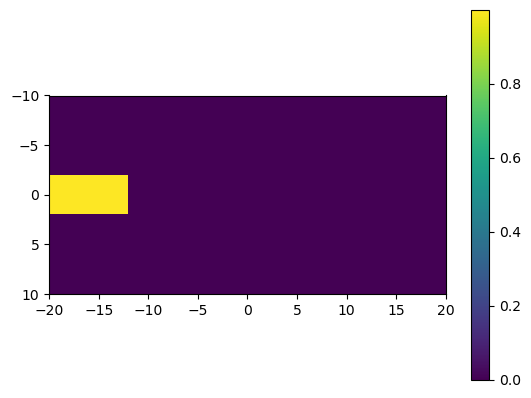

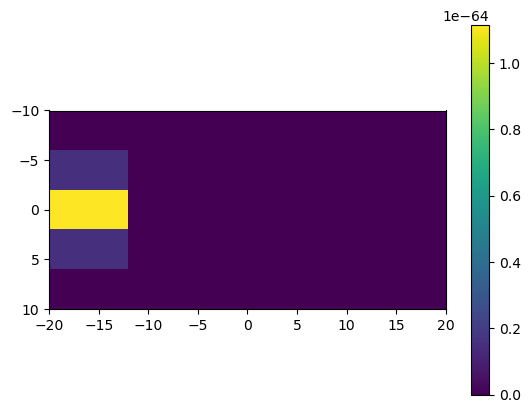

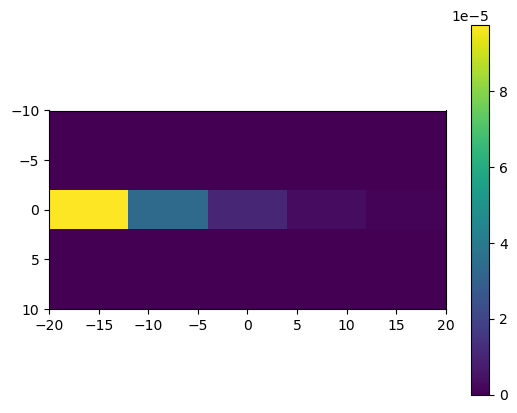

In [142]:
#plotting
# for t in range(0,t_max):
plt.figure(9)
plt.imshow(np.sum(post_avxc1,1),extent=[-lrange,lrange, mrange,-mrange])
plt.colorbar()
plt.figure(10)
plt.imshow(np.sum(post_axc2,1),extent=[-lrange,lrange, mrange,-mrange])
plt.colorbar()
plt.figure(11)
plt.imshow(np.sum(post_vxc2,1),extent=[-lrange,lrange, mrange,-mrange])
plt.colorbar()